In [8]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import numpy as np
import librosa
import os
from IPython.display import Audio
from pydub import AudioSegment

def audio(audio_path):
      # Waveform
      waveform, sample_rate = torchaudio.load(audio_path)
      waveform_mono = torch.tensor(librosa.to_mono(waveform.numpy()))
      # Spectrogram
      transform = torchaudio.transforms.Spectrogram() # hop_length=win_length/2=400/2=200
      spectrogram = transform(waveform)
      spectrogram = spectrogram[:, 1:101, :].numpy()
      spectrogram_mono = (spectrogram[0, :, :] + spectrogram[1, :, :]) / 2
      spectrogram_mono = torch.tensor(librosa.amplitude_to_db(spectrogram_mono))
      return waveform_mono, spectrogram_mono, sample_rate

def plot_waveform(waveform, sample_rate):
      waveform = waveform.numpy()
      num_frames = len(waveform)
      time_axis = np.arange(0, num_frames) / sample_rate
      plt.figure(figsize=(12, 6))
      plt.grid(True)
      plt.plot(time_axis, waveform)
      plt.title('Waveform')
      plt.xlabel('Time (s)')
      plt.ylabel('Amplitude')

def plot_spectrogram(spectrogram, sample_rate):
      spectrogram_db = spectrogram.numpy()
      num_bins, num_frames = spectrogram_db.shape
      time_max = num_frames/(sample_rate/2)*100
      frequency_max = 10000 # Hz
      hop = 0.5 # 0.5*window_length
      plt.figure(figsize=(16, 6))
      plt.imshow(spectrogram_db, origin="lower", aspect="auto", extent=[0, time_max, 0, sample_rate/2*hop])
      plt.title('Spectrogram')
      plt.xlabel('Time (s)')
      plt.ylabel('Frequency (Hz)')
      plt.ylim([0, frequency_max])
      plt.colorbar(format='%+2.0f dB')
      plt.show()

def split_song(waveform, sample_rate, input_path, output_path, file):
      n_window = waveform.shape[0]
      song_duration = n_window/sample_rate*1000 # ms
      trace_duration = 15000 # ms
      t_start = 0 # ms
      t_end = trace_duration # ms
      file_path = input_path + file
      song = AudioSegment.from_wav(file_path)
      file_name = file[0:-4]
      for chunk in range(int(np.floor(song_duration/trace_duration))):
            trace = song[t_start:t_end]
            trace.export(output_path+file_name+str(chunk+1)+'.wav', format="wav")
            t_start += trace_duration
            t_end += trace_duration

Chopin-Etude-Op.-10-no-4-“Torrent”.wav


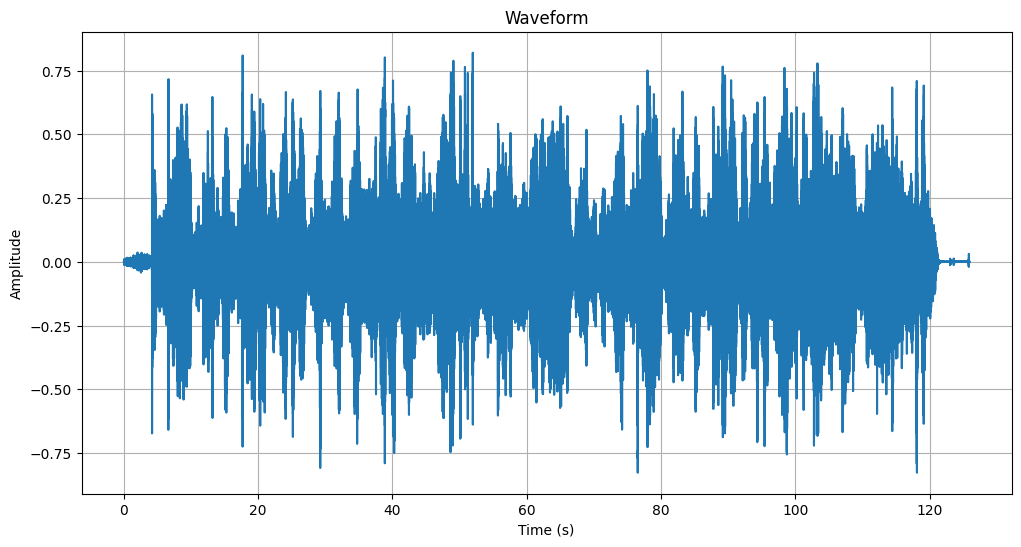

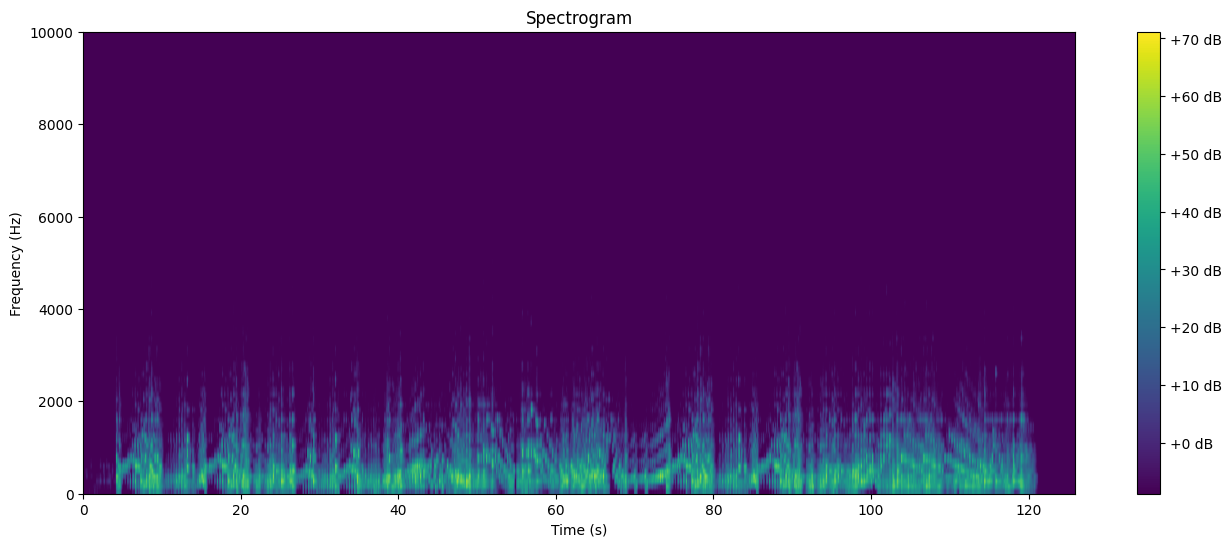

Chopin-Etude-Op.-10-No.-5-_Black-Keys_.wav


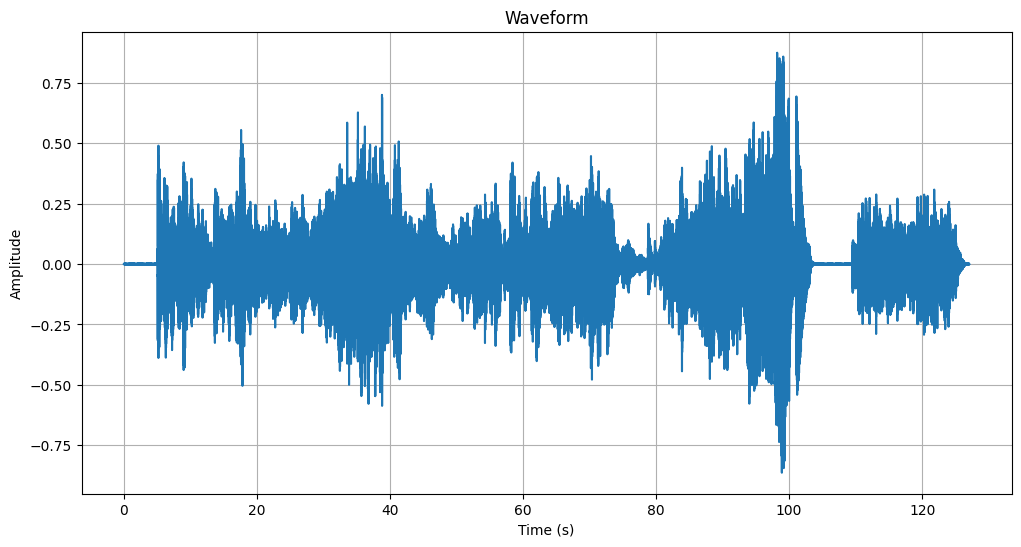

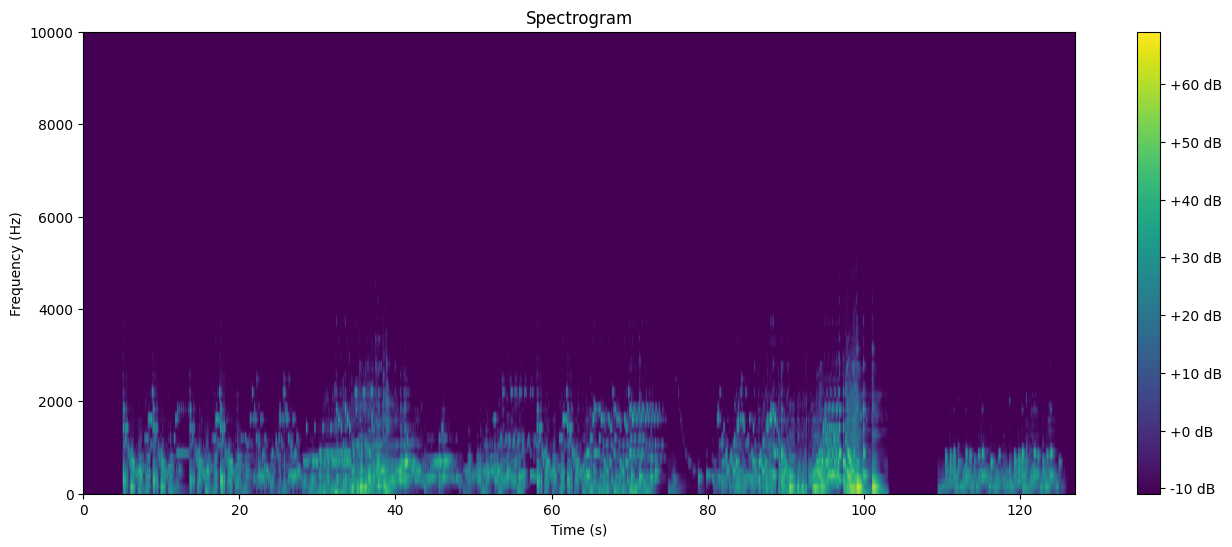

Chopin-Waltz-in-C-Sharp-Minor-_Op.-64-No.-2_.wav


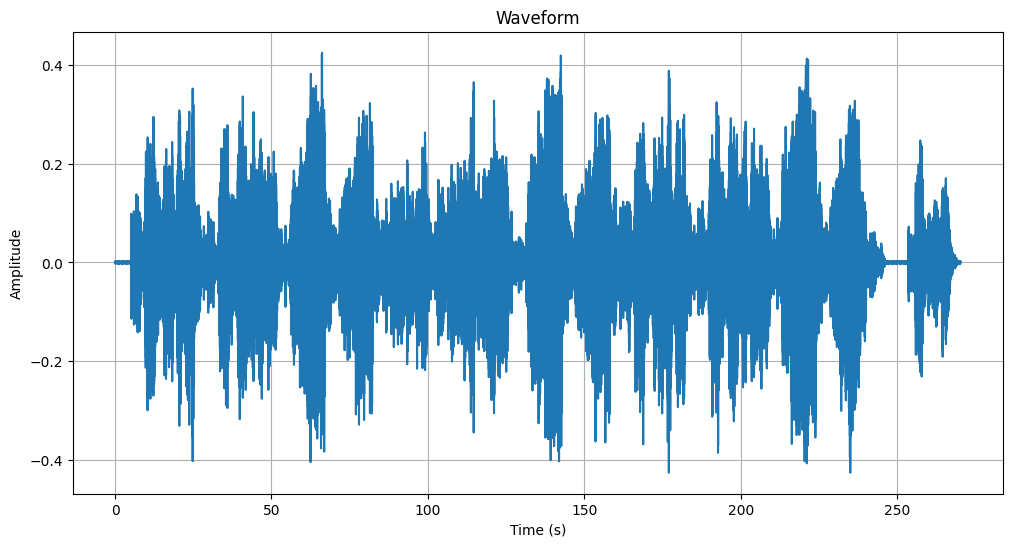

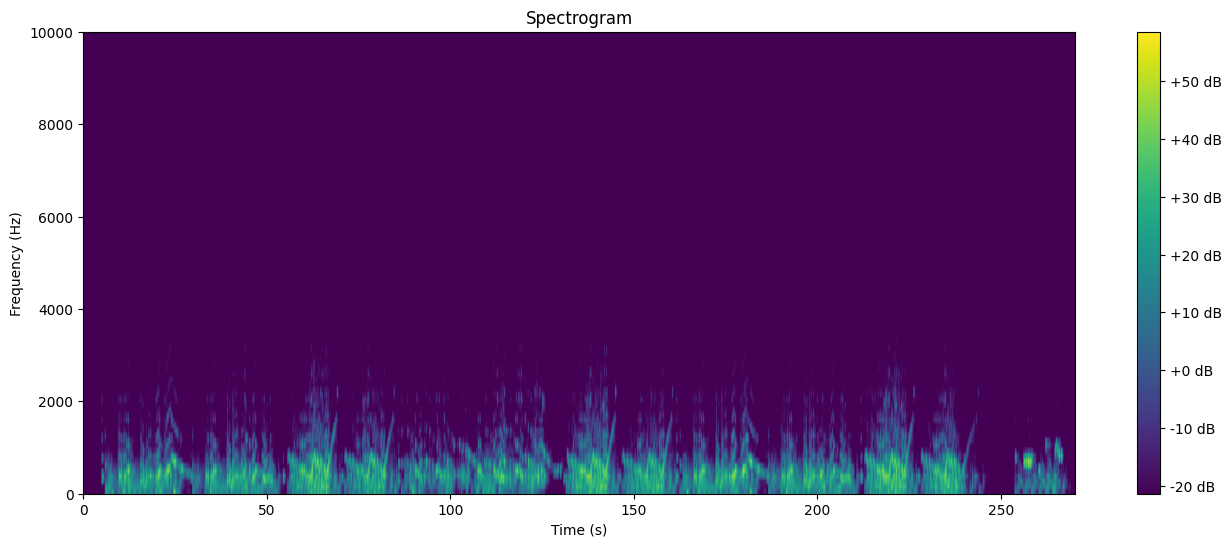

Liszt-Liebestraum-No.-3-_Love-Dream_.wav


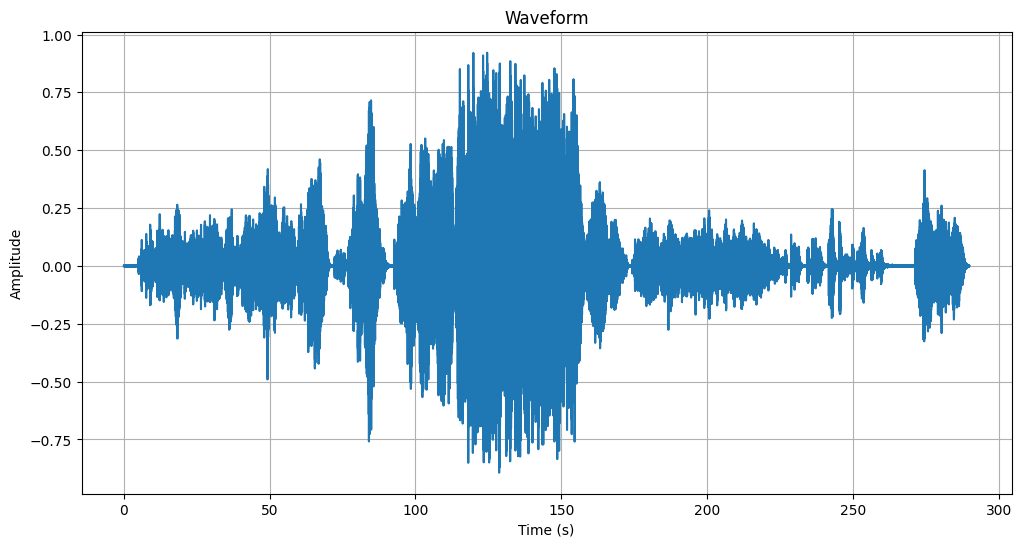

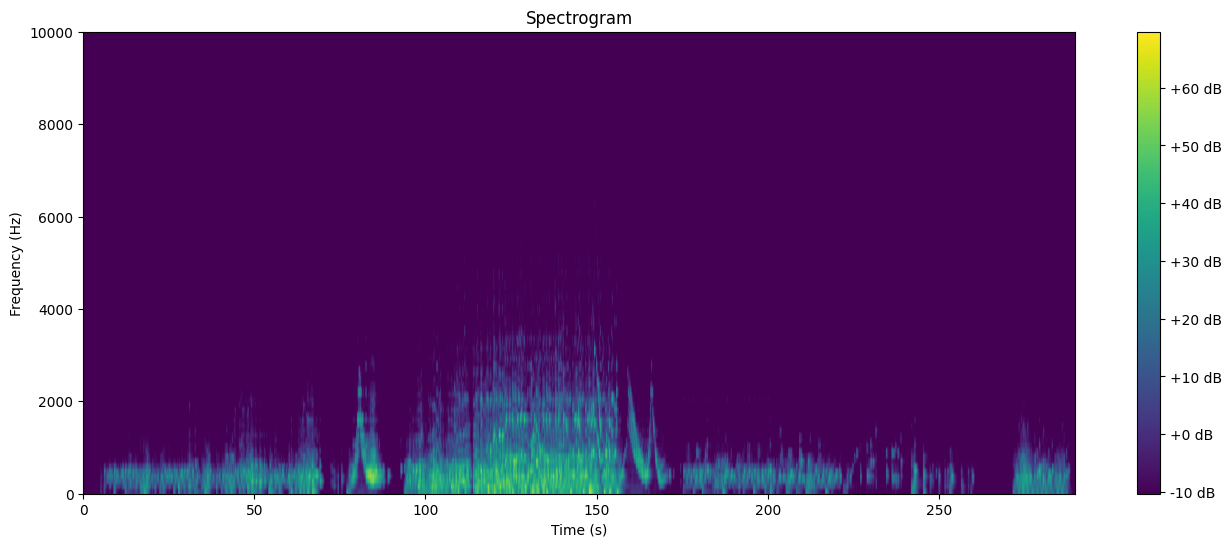

Rachmaninoff-Prelude-g.wav


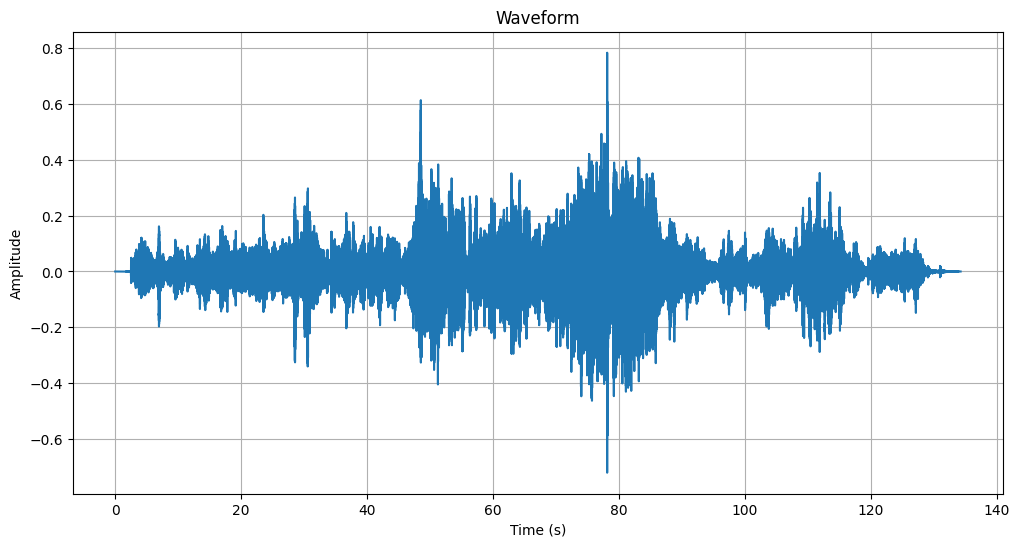

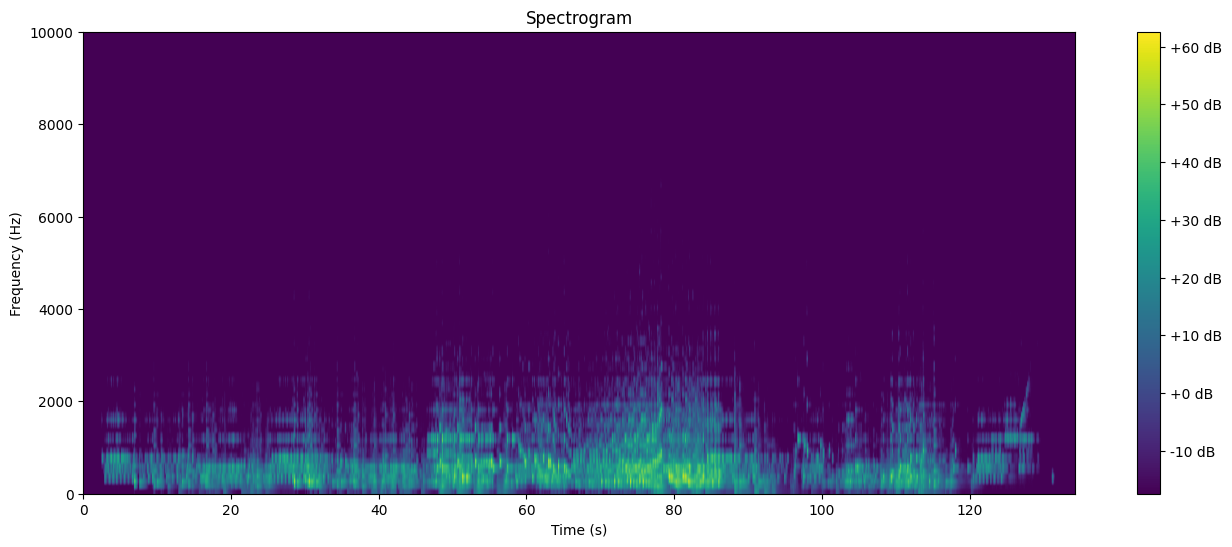

Yuja-Wang-plays-Schubert_Liszt-_-Erlkönig.wav


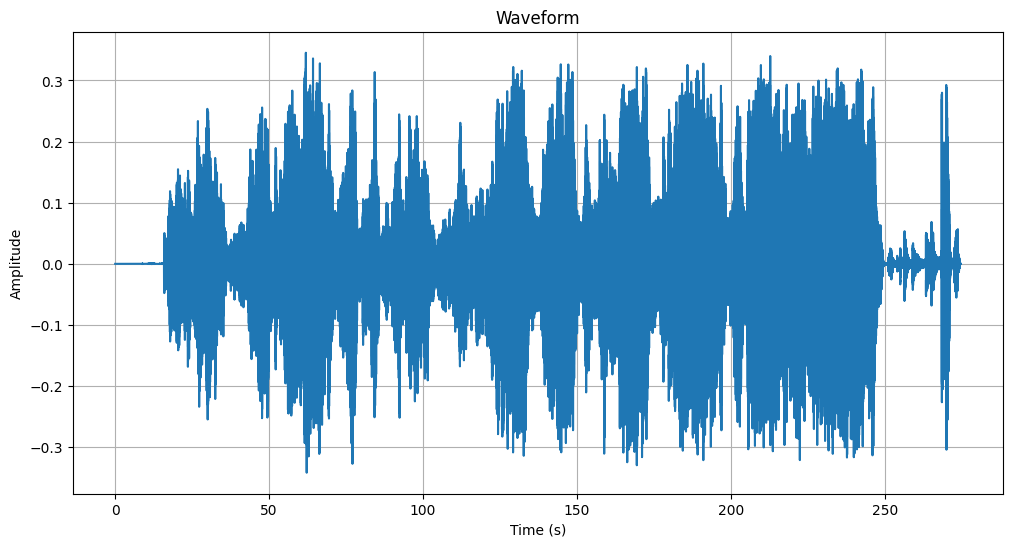

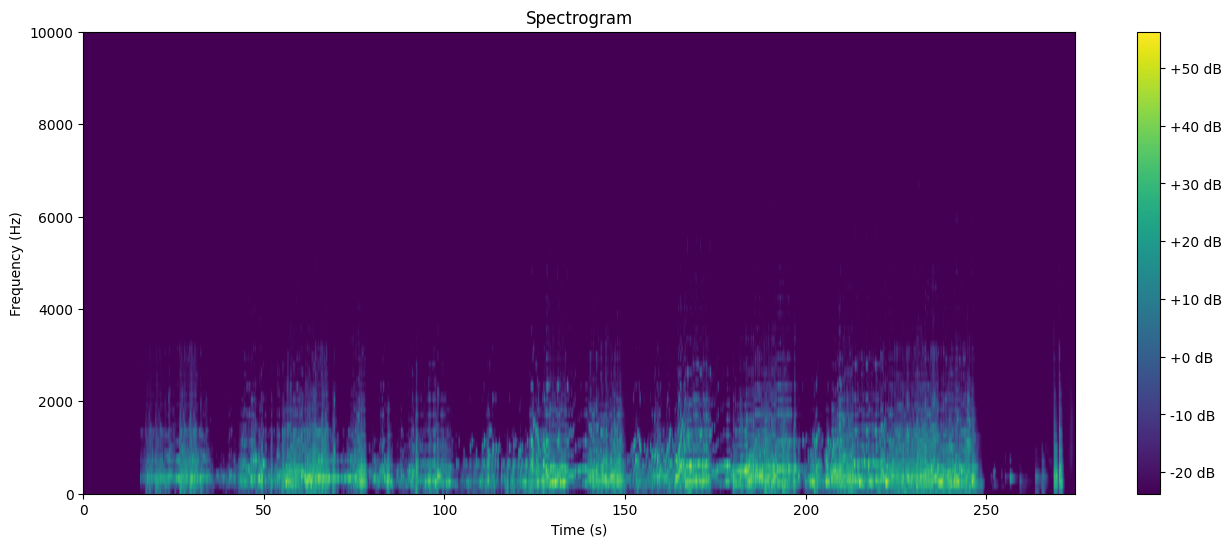

In [9]:
source_path = 'source/example_dataset/'
output_path = 'output/'
file_list = os.listdir(directory_path)
for file_name in file_list:
      file_path = source_path + file_name
      waveform, spectrogram, sample_rate = audio(file_path)
      split_song(waveform, sample_rate, source_path, output_path, file_name)
      print(file_name)
      plot_waveform(waveform, sample_rate)
      plot_spectrogram(spectrogram, sample_rate)